In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import datetime

In [30]:
# đọc dữ liệu file
df = pd.read_csv('Data/LordsMobileVN_clean.csv')

# Xử lí comment

In [31]:
def get_comments(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

# Tạo một DataFrame mới cho comments

Gồm các thuộc tính sau : 

- comment_id
- comment_text
- comment_time
- post_id

In [32]:
def creatCommentsFrame(df):
    df_result = {"comment_id" : [],
                 "commenter_id" : [],
                   "comment_text" : [],
                   "comment_time" : [],
                   "comment_reactions" : [],
                   "post_id" : []}
    
    new_df = df[~df["comments_full"].isna()]
    for index, rows in new_df.iterrows():
        x = rows["comments_full"]
        for comment in get_comments(x):
            try:
                df_result['comment_id'].append(comment['comment_id'])
                df_result['commenter_id'].append(comment['commenter_id'])
                df_result['comment_text'].append(comment['comment_text'])
                df_result['comment_time'].append(comment['comment_time'])
                df_result['comment_reactions'].append(comment['comment_reactions'])
                df_result['post_id'].append(rows.post_id)
            except:
                continue
    return pd.DataFrame(df_result)

In [33]:
df_comment = creatCommentsFrame(df)
df_comment

,comment_id,commenter_id,comment_text,comment_time,comment_reactions,post_id
0,311719684964358,100007411590912,Chủ game chắc nó giầu vãi,2023-11-13 23:49:00,None,752698296898984
1,6957330744328745,100040030605215,.,2023-11-13 23:16:00,None,752698296898984
2,729455188515040,100016409943616,Ad cug chơi nông trại như ngta mới bít thui,2023-11-13 21:00:00,None,744907481011399
3,878732183412971,100002344420914,Bang ngta deff rally. Bang t deff rally nhưng ...,2023-11-13 18:00:00,None,744907481011399
4,854447549482933,100021994396973,Vừa kvk xong thua be bét.,2023-11-13 16:00:00,None,744907481011399
...,...,...,...,...,...,...
4410,665009785197223,100024432611793,"Ảnh nhìn quen quen nhỉ,. giống của a Sup quá",2023-08-14 00:00:00,None,683580670477414
4411,276891101629111,100040989850689,😄,2023-08-14 00:00:00,None,683580670477414
4412,1033424044313676,100006890527736,Tiền việt có mà cả tỉ đồng. Không có vài tỏi đâu.,2023-08-14 00:00:00,None,683580670477414
4413,213912384958987,100013533668698,Lỏ thủ,2023-08-14 00:00:00,None,683580670477414


# Phân tích comment

In [34]:
# tổng số lượng comment
sum(df.comments)

12543

In [35]:
# số lượng comment trung bình
df.comments.mean()

62.715

In [36]:
# số lượng comment của các bài đăng dao động trong khoảng
df.comments.median()

33.5

<Axes: xlabel='index'>

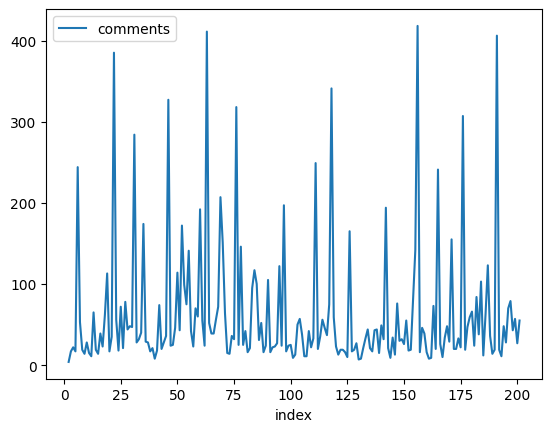

In [37]:
# biến động số lượt comment qua từng bài đăng
# thêm index cho dataframe
df_post = df.reset_index(inplace = False)
df_post["index"] = df_post["index"] + 1
df_post.plot(kind = "line", x = "index", y = "comments")

In [38]:
text = df_comment["comment_text"].str.cat(sep = ' ')
text

'Chủ game chắc nó giầu vãi . Ad cug chơi nông trại như ngta mới bít thui Bang ngta deff rally. Bang t deff rally nhưng toàn gặp acc đại đế với full champ 12+ Vừa kvk xong thua be bét. Nhà rồng mộng mơ cày chay hog bt có lấy đc ko phiêu wa\U0001f979\U0001f979 Tôi full hết rồi Kvk bay 1/3 lính Hữu Quang lm2023 lm001 Cày con acc tâm huyết mất mẹn nó=)) Ngon . Kvk tan nát luôn Cho vài k di thư đi ad. Còn thiếu 3k nữa mới có t5. Hichic Ad ơi phát code lẹ điiiiii đói sắp chết r kvk chết quá nhìu lính r cần 1 thứ j đó để bồi bổ cơ thể \U0001f979 Mới được ông bc cho 5 cái dịch chuyển \U0001faf0 Ước được nhận quà Chơi game 7năm chưa 1 lần nổ hủ Cho code đi igg Nhận hoài mà có dc 10 gem. Nên chả quan tâm Nay k thấy có code nhỉ Lâu lâu mới được 1 cái:) Có lại may Có gì đâu mà sốc 1277282565 Top fan\nNgọc Gemma Ko sốc lắm chỉ sốc nặng :))) ID:640991056 Xin code đi igg codeeeee igg id-787632664 Ngọc Bảo lên lúa mạch chuẩn bị ăn mừng Noel bác eiii Lords Mobile bảo trì xong hết lag không chứ lag quá 

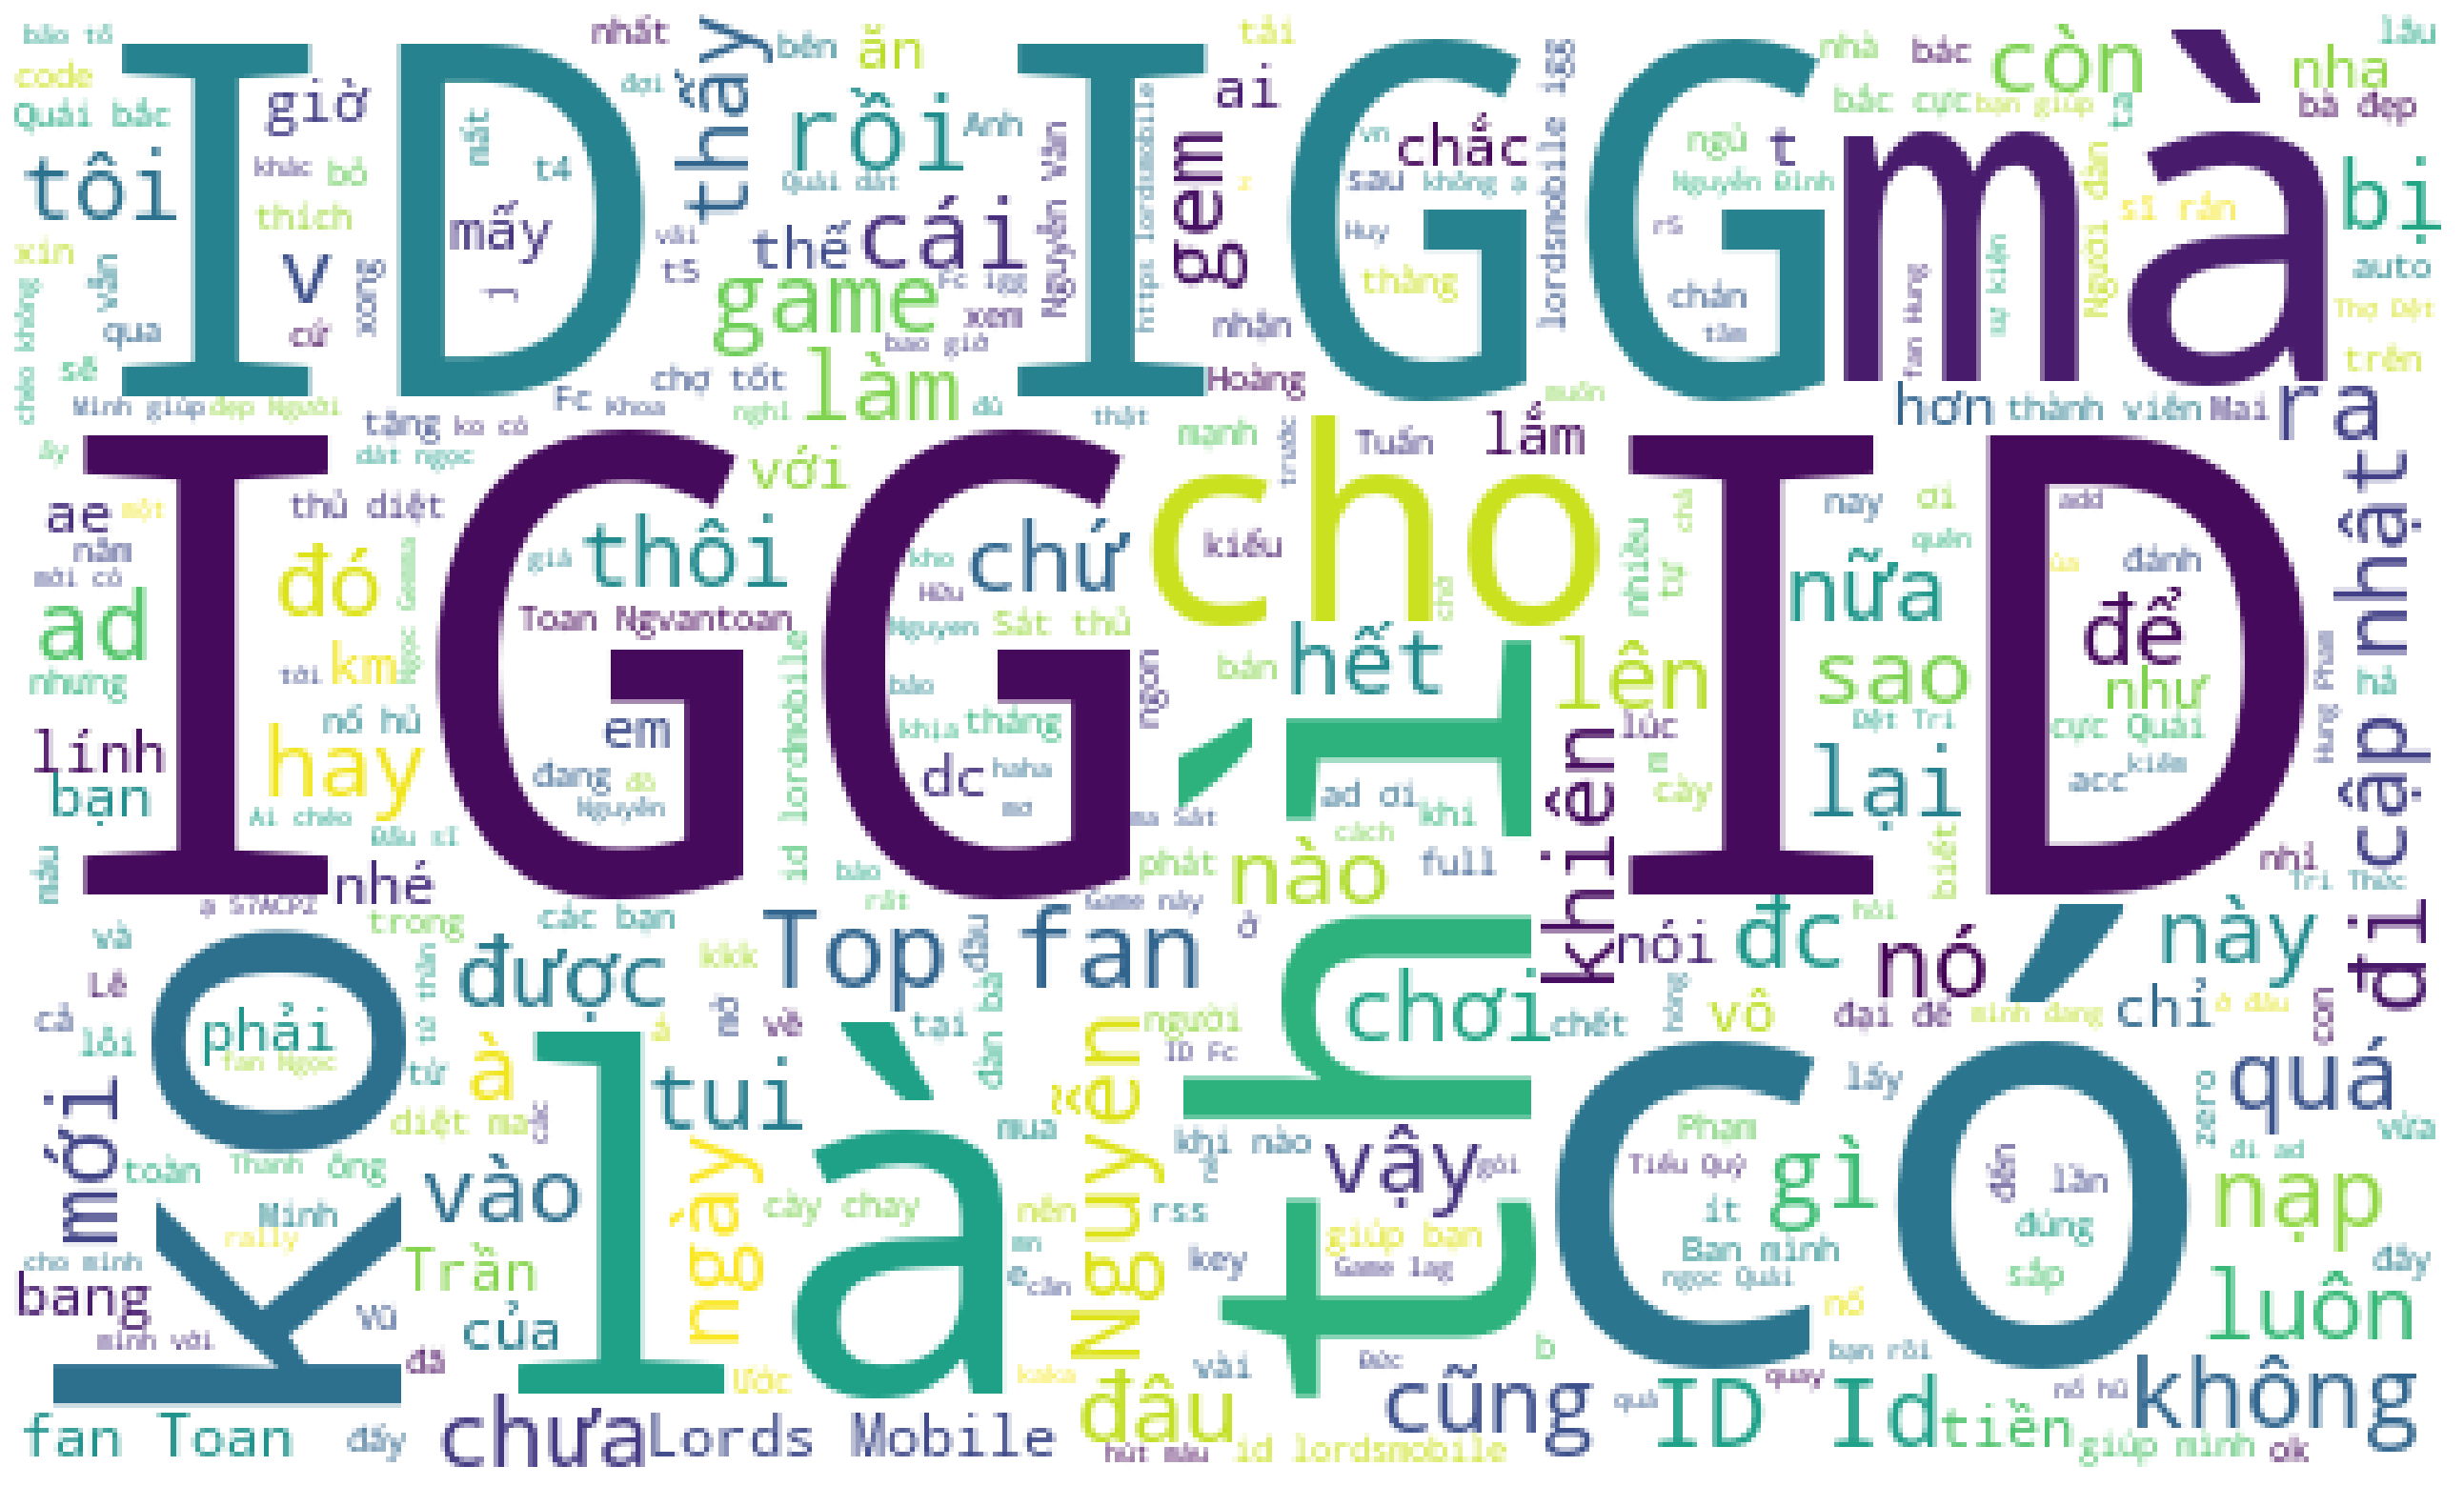

In [39]:
# Import WordCloud library
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto = text
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [40]:
df_comment['comment_time'] = pd.to_datetime(df_comment['comment_time'])

In [41]:
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_comment['week_day'] = df_comment['comment_time'].apply(lambda x: week_day[x.weekday()])

Text(0, 0.5, 'Comments')

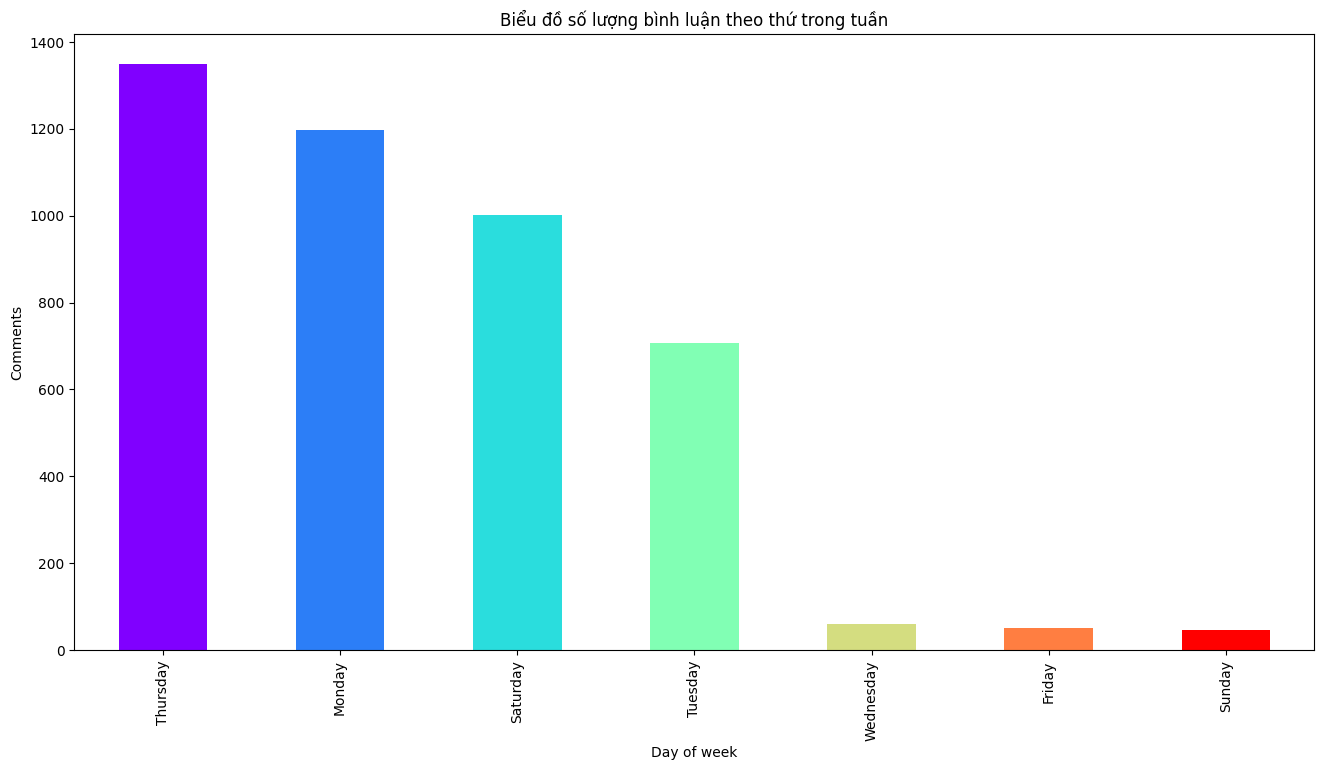

In [42]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(df_comment['week_day'] .unique())))
df_comment['week_day'] .value_counts().plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Biểu đồ số lượng bình luận theo thứ trong tuần')
plt.xlabel('Day of week')
plt.ylabel('Comments')

Text(0, 0.5, 'Total')

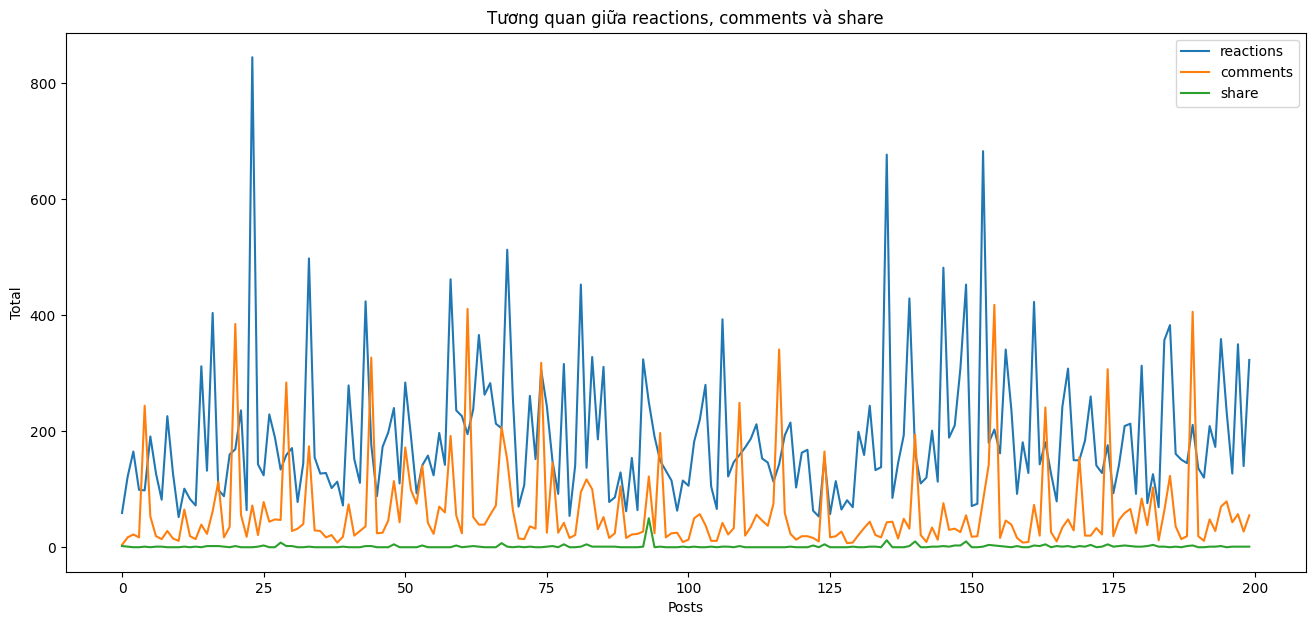

In [43]:
fig_3, ax_3 = plt.subplots(1,1)
ax_3.plot(df['reaction_count'],label = 'reactions')
ax_3.plot(df['comments'], label = 'comments')
ax_3.plot(df['shares'],label = 'share')
ax_3.legend()
fig_3.set_figwidth(16)
fig_3.set_figheight(7)
ax_3.set_title("Tương quan giữa reactions, comments và share")
ax_3.set_xlabel("Posts")
ax_3.set_ylabel("Total")